In this session, we will illustrate several useful Machine Learning concepts. The first thing we will do is to generate a toy classification problem (we did a regression this morning).

Then we will analyse a real world dataset with machine learning.

We start as usual by doing the imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')

diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## A dummy classification task

Let us redo most steps of the first practical but in a classification setting : The new function we want to learn is the arbitrary following one :
$y(x) = round(\frac{1}{1+(1.3 x^3 - 5 x^2 + 3.6^x + 1.6)})$
It is already implemented and returns either zero or one.

Redo the previous steps of generating and plotting the data as well as the underlying relationship.

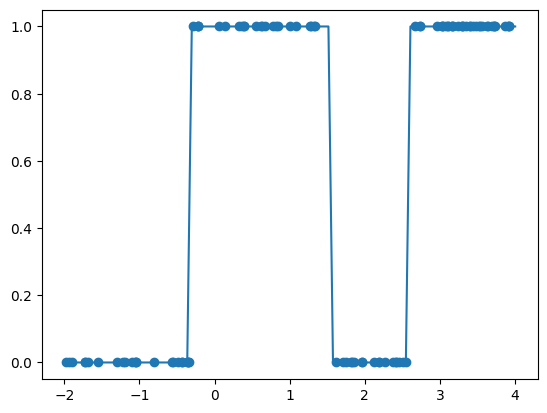

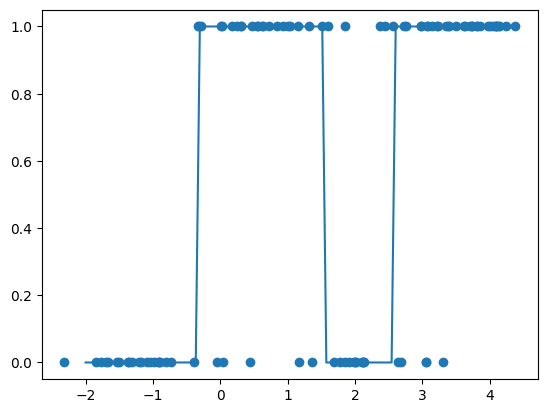

In [2]:
def base_function(x):
    return np.round(1 / (1 + np.exp(-(1.3 * x ** 3 - 5 * x ** 2 + 3.6 * x + 1.6))))

# generate and plot the data as well as the underlying relationship.

toy_data = np.random.uniform(-2, 4, 100)
toy_label = base_function(toy_data)

noise = np.random.normal(0, 0.5, 100)
toy_data_w_noise = toy_data + noise

np.linspace(-2, 4, 100)
plt.plot(np.linspace(-2, 4, 100), base_function(np.linspace(-2, 4, 100)))
plt.scatter(toy_data, toy_label)
plt.show()

np.linspace(-2, 4, 100)
plt.plot(np.linspace(-2, 4, 100), base_function(np.linspace(-2, 4, 100)))
plt.scatter(toy_data_w_noise, toy_label)
plt.show()

Now fit a small neural network using scikit learn again, using MLPClassifier(max_iter=5000). Can this model properly learn the underlying function ?

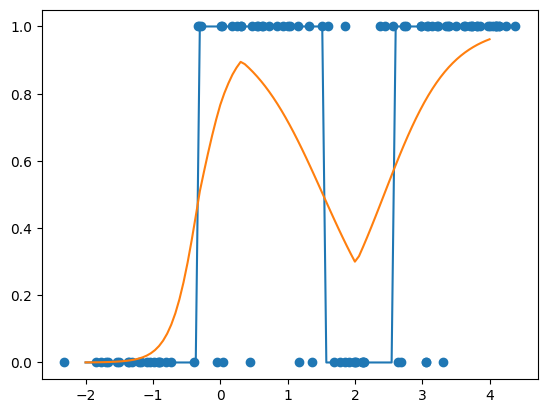

In [3]:
# Now fit a small neural network using scikit learn again, using MLPClassifier(max_iter=5000). Can this model properly learn the underlying function ?
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=5000).fit(toy_data_w_noise.reshape(-1, 1), toy_label)

plt.plot(np.linspace(-2, 4, 100), base_function(np.linspace(-2, 4, 100)))
plt.scatter(toy_data_w_noise, toy_label)

plt.plot(np.linspace(-2, 4, 100), clf.predict_proba(np.linspace(-2, 4, 100).reshape(-1, 1))[:, 1])
plt.show()

Now the absolute difference does not really make sense as a metric. We can count the error rate. This amounts to to the ratio of the predictions where the predicted value and the true one differ. What is the error rate of your model ?

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(toy_label, clf.predict(toy_data_w_noise.reshape(-1, 1)))


0.86

# A real life machine learning example

Our dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically **predict whether a patient has diabetes**, based on certain diagnostic measurements included in the dataset.

The dataset consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Can you build a machine learning model to accurately predict whether the patients in the dataset have diabetes or not?

The data is relatively clean, we won't discuss pre-processing in detail here, besides the very basics.

Let's **print the columns and the few top values** from the dataset, to see what we're working with.

In [5]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's take a look at the Outcome variable that we want to predict. **How many people from our dataset have diabetes?**

In [7]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Do we have **missing values** in any columns?

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Let's look at the **distribution** of each feature to see if we find anything weird.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

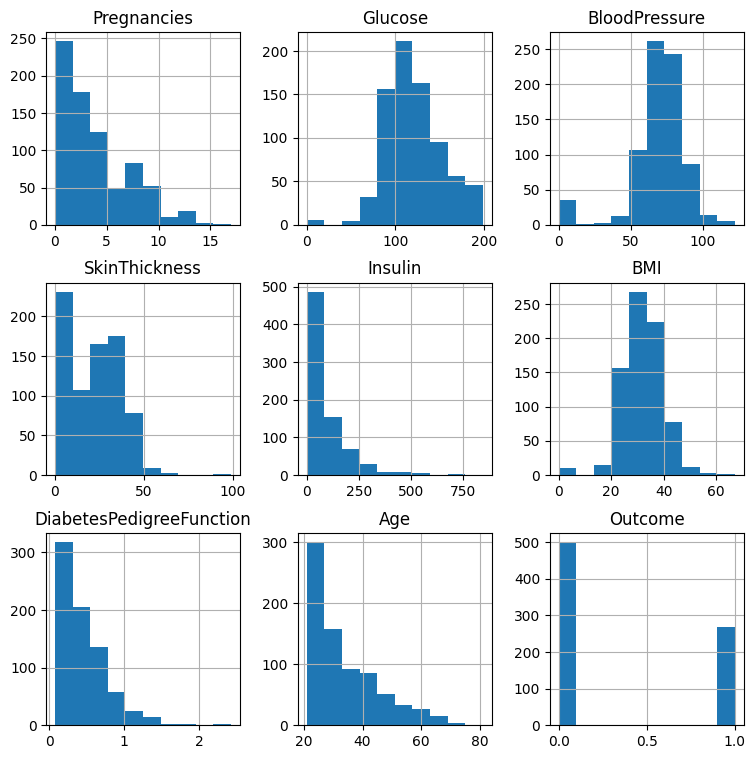

In [9]:
diabetes.hist(figsize=(9, 9))

From the histagram we can see `0` values for *Blood Pressure, BMI, Skin Fold Thikness, Insulin,* and *Blood Glucose*. Those values aren't realistic, and are probably in fact hidden **missing values**.

For *Blood Pressure, BMI,* and *Glucose*, only a **few values** are missing. We can safely **drop** those rows.

In [10]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
diabetes_mod

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


It seems like there are a lot of `0` values in the *Insulin* column. Let's check how many.

In [11]:
diabetes[diabetes.Insulin == 0].shape[0]

374

We will **lose a lot of information** if we remove all rows where Insulin value is zero. It seems like a valuable variable to drop it completely. Let's keep it for now and see how it goes.

Now that the data is ready we can **train our model**. Let's try a model called Logistic Regression.

First, we will create `X` variable with the **features**, and `y` variable with the **outcome**. We will need to split the data into **train and test sets**. There is a function `train_test_split` for this. Please google it to find scikit documentation with the example of usage. We will use **accuracy** to get the estimates. It's a good choice because our outcome variable is rather balanced.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_mod[feature_names]
y = diabetes_mod['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now the fun part!
To get our predictions we need to:
1. **Initialize** the model
2. **Fit** the model (using the input feature vectors `X` and the outcome vector `y` of the **training set**)
3. Use the trained model to **predict** outcome values from the **training set**, and then the **test set** (here, we only provide the input features `X`, the model will give us the predicted `y` values)
4. **Compare** the values the model predicted with the actual outcome values. We will use the accuracy_score function. Please google how to use it.

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7789291882556131

In [16]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8

## Congratulations on your first model!
The accuracy on the test set is almost as good as the accuracy on the training set. That means that the model doesn't **overfit** to the training set.
Let's try another model, that is famous for overfitting if not tuned well.

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [19]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7862068965517242

We can see that the model **fits the training data perfectly** (which is already suspicious), and performs much worse on the test set. One of the way to prevent overfitting is to force the model to be "**simpler**". For the Decision Tree algorithm, one of the indication of its complexity is its "depth". Let's try limiting it to `3`.

In [20]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.770293609671848

In [22]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7931034482758621

Now we can see that the accuracy **decreased** for the training set, but **increased** for the test set. It means our model **generalizes** better, and will be able to predict unseen cases.